In [11]:
from fastai.vision.all import *

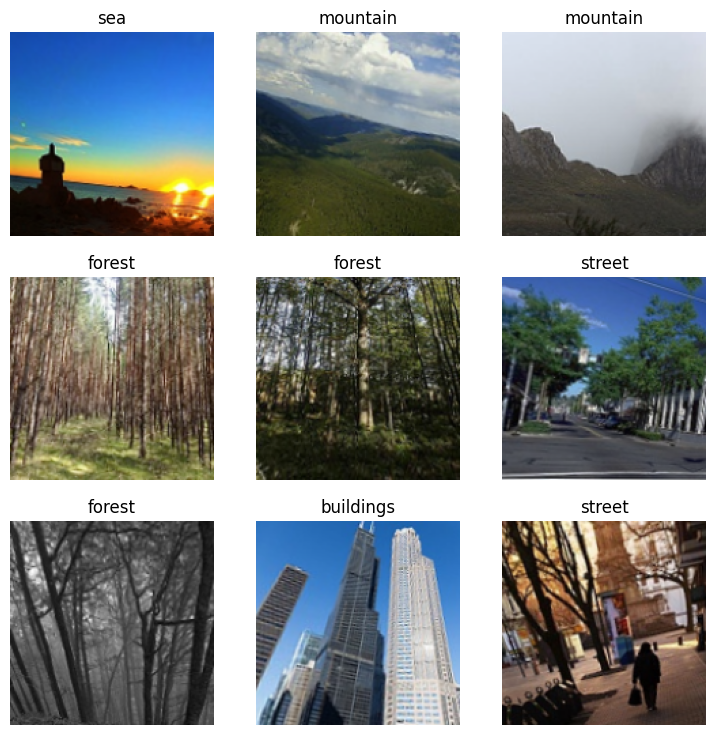

In [12]:
path = Path('./scene_classification/data/')
dls = ImageDataLoaders.from_folder(path, train='train_set', valid='valid_set', item_tfms=[Resize(150)], batch_tfms=aug_transforms(mult=1.5, size=150, min_scale=0.75))
dls.show_batch()

In [13]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.666954,0.489882,0.846333,00:10


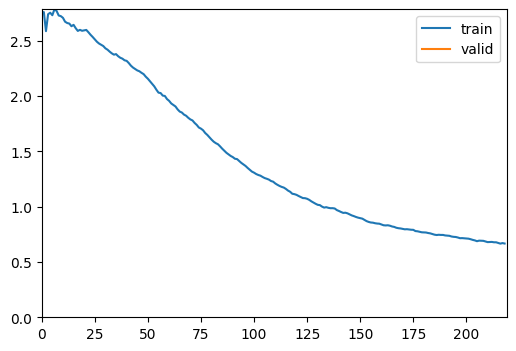

epoch,train_loss,valid_loss,accuracy,time
0,0.455477,0.341490,0.889000,00:12
1,0.334806,0.293209,0.906333,00:13
2,0.253491,0.225000,0.921667,00:14
3,0.192662,0.218741,0.926667,00:13
4,0.182488,0.223821,0.925000,00:14


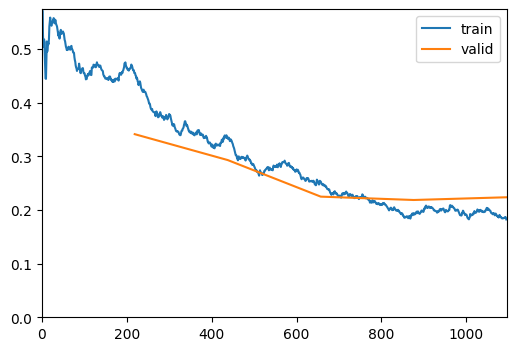

In [ ]:
learn.fine_tune(20, base_lr=1e-3, cbs=[ShowGraphCallback()])

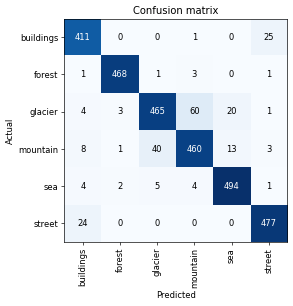

In [ ]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

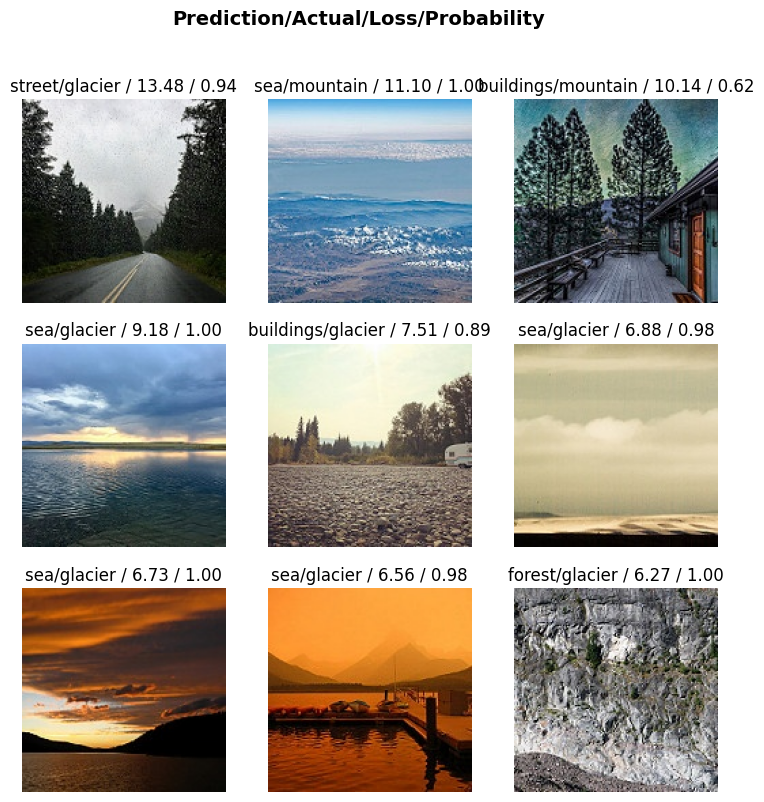

In [ ]:
interp.plot_top_losses(9)